In [11]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings('ignore')
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)
import warnings
warnings.filterwarnings('ignore')
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)  #  link pandas to plotly and add the iplot method

sns.set(style="darkgrid")

In [12]:
df = pd.read_csv('anemia.csv')

In [13]:
# Trim function 
def trim(df):
    df.columns = df.columns.str.strip()
    df = df.drop_duplicates()
    df.columns = df.columns.str.lower()
    df.columns = df.columns.str.replace(' ','_')
    df_obj = df.select_dtypes(['object'])
    df[df_obj.columns] = df_obj.apply(lambda x: x.str.strip())
    print("All column names have been striped, lowered case, replaced space with underscore if any")
    print("Dropped duplicated instances if any")
    print("Categorical instances have been striped")
    return df
df = trim(df)

All column names have been striped, lowered case, replaced space with underscore if any
Dropped duplicated instances if any
Categorical instances have been striped


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 534 entries, 0 to 1396
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   gender      534 non-null    int64  
 1   hemoglobin  534 non-null    float64
 2   mch         534 non-null    float64
 3   mchc        534 non-null    float64
 4   mcv         534 non-null    float64
 5   result      534 non-null    int64  
dtypes: float64(4), int64(2)
memory usage: 29.2 KB


In [14]:
# I made this function to help in constructing graphics
df_graph=df.copy()
def categorization (data):
  df_graph.astype({'gender':'object'}, {'Result': 'object'})
  df_graph.replace(to_replace={'gender': {0:'Male', 1:'Female'},
                         'result': {0:'Not Anemic', 1:'Anemic'}}, inplace=True)
  return df_graph  
  

In [5]:
categorization(df_graph)

,gender,hemoglobin,mch,mchc,mcv,result
0,Female,14.9,22.7,29.1,83.7,Not Anemic
1,Male,15.9,25.4,28.3,72.0,Not Anemic
2,Male,9.0,21.5,29.6,71.2,Anemic
3,Male,14.9,16.0,31.4,87.5,Not Anemic
4,Female,14.7,22.0,28.2,99.5,Not Anemic
...,...,...,...,...,...,...
946,Male,11.8,21.2,28.4,98.1,Anemic
1156,Female,15.1,21.3,32.4,100.6,Not Anemic
1160,Female,14.8,19.5,32.2,72.1,Not Anemic
1376,Female,13.2,20.4,28.0,97.4,Anemic


# Exploratory Analysis

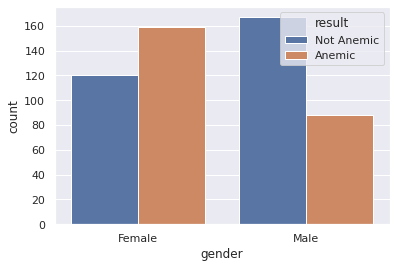

In [ ]:
sns.countplot(data=df_graph,x=df_graph['gender'], hue='result')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1421 entries, 0 to 1420
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Gender      1421 non-null   object 
 1   Hemoglobin  1421 non-null   float64
 2   MCH         1421 non-null   float64
 3   MCHC        1421 non-null   float64
 4   MCV         1421 non-null   float64
 5   Result      1421 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 66.7+ KB


In [ ]:
X = df.drop('result', axis=1)
y = df.result

In [ ]:
# Function to separate numerical and categorical columns
def get_num_cat_col(df, n):
    numerical_columns = []
    categorical_columns = []
    for col in df.columns:
        len_unique = len(df[col].unique())
        if len_unique <= n:
            categorical_columns.append(col)
        else:
            numerical_columns.append(col)
    return numerical_columns, categorical_columns

numerical_columns, categorical_columns = get_num_cat_col(X, 30)
print(f"categorical = {categorical_columns}")
print()
print(f"numerical = {numerical_columns}")
print()
X[categorical_columns].info()

categorical = ['gender']

numerical = ['hemoglobin', 'mch', 'mchc', 'mcv']

<class 'pandas.core.frame.DataFrame'>
Int64Index: 534 entries, 0 to 1396
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   gender  534 non-null    int64
dtypes: int64(1)
memory usage: 24.5 KB


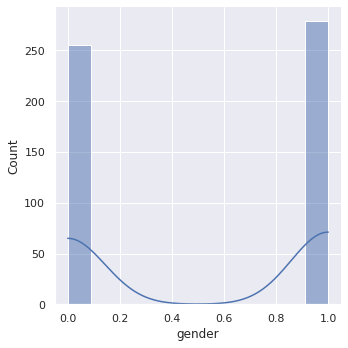

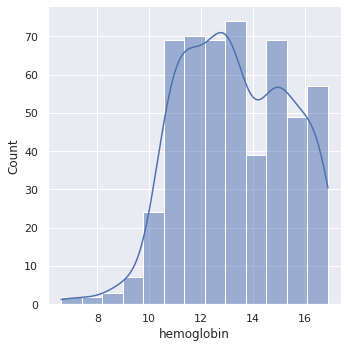

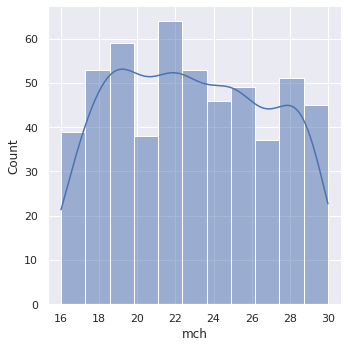

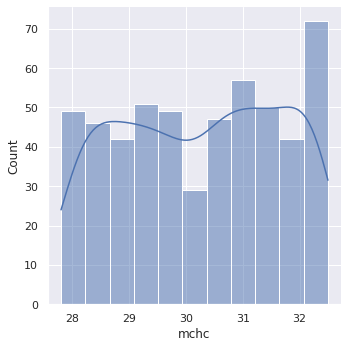

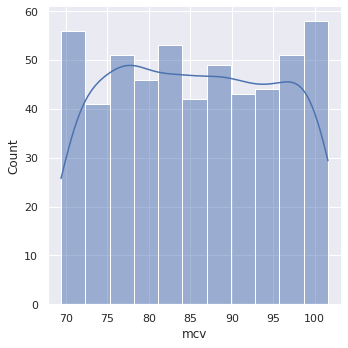

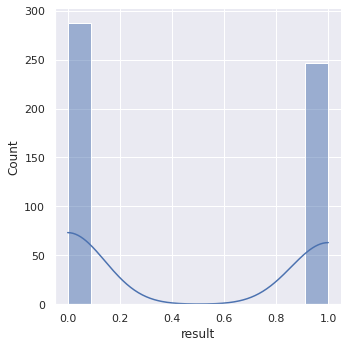

In [ ]:
# Graphics of numerical columns
for numerical in df:
  sns.displot(df,x=numerical,kde=True)

In [ ]:
# Descritive analysis
df_graph.describe(percentiles = [.25, .5, .75, .95, .99]).round(2)

,hemoglobin,mch,mchc,mcv
count,534.00,534.00,534.00,534.00
mean,13.29,22.91,30.25,85.65
std,2.07,3.95,1.41,9.60
min,6.60,16.00,27.80,69.40
25%,11.60,19.50,29.00,77.32
50%,13.10,22.75,30.40,85.45
75%,14.98,26.10,31.48,94.15
95%,16.60,29.10,32.33,100.60
99%,16.80,29.80,32.50,101.50
max,16.90,30.00,32.50,101.60


## Investigating MCH 
MCH levels refer to the average amount of hemoglobin found in the red blood cells in the body.

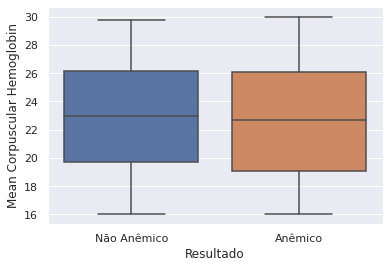

In [ ]:
sns.boxplot(y = 'mch', x = 'result', data = df_graph)
plt.xlabel('Resultado')
plt.ylabel('Mean Corpuscular Hemoglobin')
plt.show()

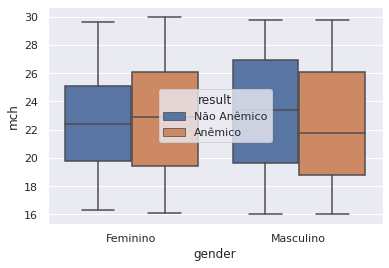

In [ ]:

sns.boxplot(x='gender',y='mch', hue='result', data=df_graph)

Analysing the boxplot, we can see that the mean of not anemic person has different behavior when compared by gender.

Text(0.5, 0, 'Result')

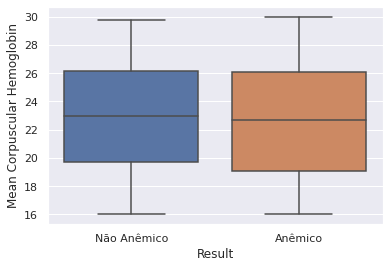

In [ ]:
sns.boxplot(x='result',y='mch', data=df_graph)
plt.ylabel('Mean Corpuscular Hemoglobin')
plt.xlabel('Result')

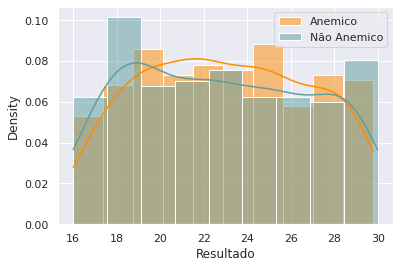

In [ ]:
sns.histplot(df[df['result'] == 0]['mch'], label = 'Anemico', stat = "density", color="darkorange", kde=True)
sns.histplot(df[df['result'] == 1]['mch'], label = 'Não Anemico', stat = "density", color="cadetblue", kde=True)
plt.xlabel('Result')
plt.legend()
plt.show()

In [ ]:
# Test-t independent
from scipy.stats import ttest_ind
stat, p = ttest_ind(df[df['result'] == 0]['mch'], df[df['result'] == 1]['mch'])
print('stat=%.3f, p=%.3f' % (stat, p))

stat=0.579, p=0.563


According to the T-test, there are no difference between the groups considering mch.

**reject null hypothesis: p>0.05(there is no difference)**

**p-value=0.05** 

## Investigating hemoglobin
Hemoglobin is a protein in the blood that allows red blood cells to deliver oxygen to the cells and tissues in the body.

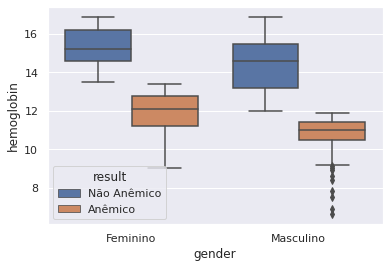

In [ ]:
sns.boxplot(x='gender',y='hemoglobin', hue='result', data=df_graph)

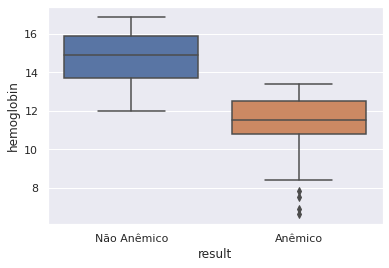

In [ ]:
sns.boxplot(x='result',y='hemoglobin', data=df_graph)

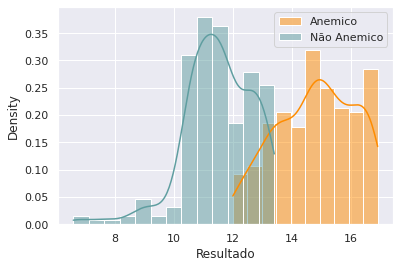

In [ ]:
sns.histplot(df[df['result'] == 0]['hemoglobin'], label = 'Anemico', stat = "density", color="darkorange", kde=True)
sns.histplot(df[df['result'] == 1]['hemoglobin'], label = 'Não Anemico', stat = "density", color="cadetblue", kde=True)
plt.xlabel('Resultado')
plt.legend()
plt.show()

In [ ]:
# Test t-independent
stat, p = ttest_ind(df[df['result'] == 0]['hemoglobin'], df[df['result'] == 1]['hemoglobin'])
print('stat=%.3f, p=%.3f' % (stat, p))

stat=30.182, p=0.000


According to the text, there is difference between the averages of groups. So, we can say that lower levels of hemoglobin induces to anemy.
**reject null hypothesis: p>0.05(there is no difference)**
**p-value=0.05** 

## Investigating MCV
Mean corpuscular volume, or MCV, is a measurement of red blood cell size

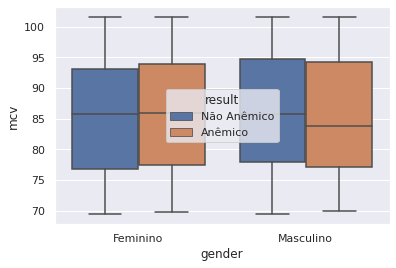

In [ ]:
sns.boxplot(x='gender',y='mcv', hue='result', data=df_graph)

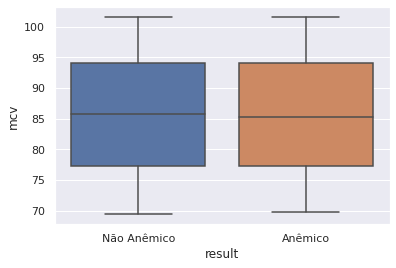

In [ ]:
sns.boxplot(y='mcv', x='result', data=df_graph)

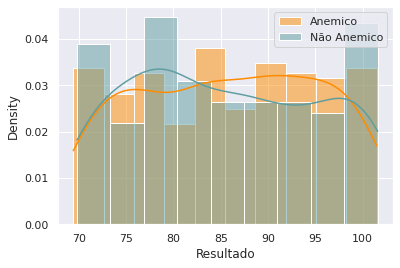

In [ ]:
sns.histplot(df[df['result'] == 0]['mcv'], label = 'Anemico', stat = "density", color="darkorange", kde=True)
sns.histplot(df[df['result'] == 1]['mcv'], label = 'Não Anemico', stat = "density", color="cadetblue", kde=True)
plt.xlabel('Resultado')
plt.legend()
plt.show()

In [ ]:
stat, p = ttest_ind(df[df['result'] == 0]['mcv'], df[df['result'] == 1]['mcv'])
print('stat=%.3f, p=%.3f' % (stat, p))

stat=0.305, p=0.760


According to the T-test, there is no difference between the groups considering mcv

**reject null hypothesis: p>0.05(there is no difference)**

**p-value=0.05** 

## Investigating MCHC
MCHC is the mean corpuscular hemoglobin concentration

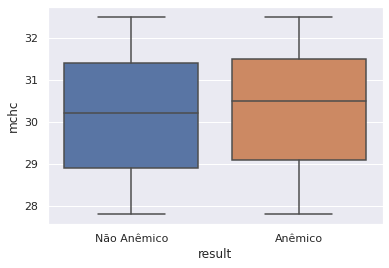

In [ ]:
sns.boxplot(y='mchc', x='result', data=df_graph)

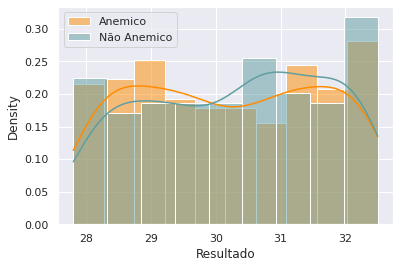

In [ ]:
sns.histplot(df[df['result'] == 0]['mchc'], label = 'Anemico', stat = "density", color="darkorange", kde=True)
sns.histplot(df[df['result'] == 1]['mchc'], label = 'Não Anemico', stat = "density", color="cadetblue", kde=True)
plt.xlabel('Resultado')
plt.legend()
plt.show()

In [ ]:
stat, p = ttest_ind(df[df['result'] == 0]['mchc'], df[df['result'] == 1]['mchc'])
print('stat=%.3f, p=%.3f' % (stat, p))

stat=-0.952, p=0.342


According to the text, there is difference between the averages of groups. So, we can say that higher levels of mchc induces to anemy.
**accept null hypothesis: p<0.05(there is difference)**
**p-value=0.05** 

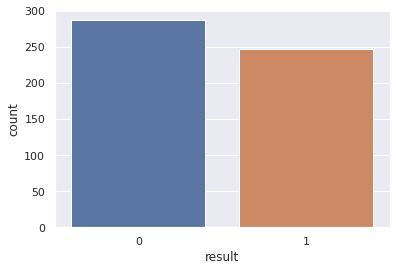

In [ ]:
sns.countplot(x="result", data=df)
plt.show()

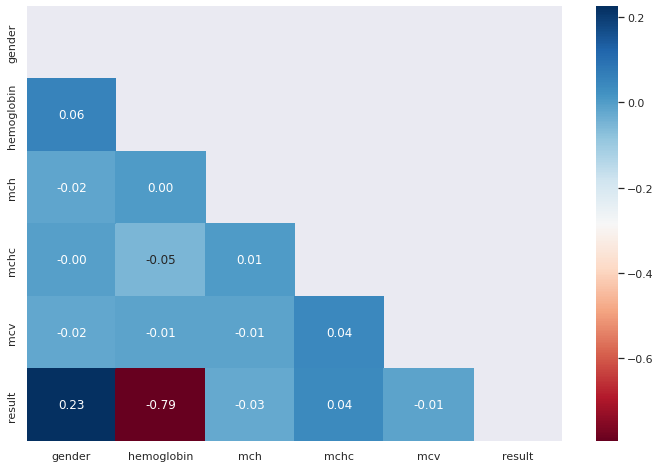

In [ ]:
# Correlation matrix (Pearson) shows that higher levels of hemoglobin induces do a lower probability of having anemia
sns.set_context(font_scale = 1.9)
plt.figure(figsize = (12,8))
sns.heatmap(
    df.corr(), 
    annot = True, 
    fmt = ".2f",
    cmap = "RdBu", 
    mask = np.triu(np.ones_like(df.corr())) 
)

plt.show()

# Modeling

 ## KNeighborsClassifier

In [15]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# Set up random seed
np.random.seed(42)

# Create the data
X = df.drop("result", axis=1)
y = df["result"]


# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Instantiate the model
clf = KNeighborsClassifier()

# Fit
clf.fit(X_train, y_train)

# Score
clf.score(X_test, y_test)

0.9345794392523364

In [16]:
# Make predictions
y_pred = clf.predict(X_test)

print(f"Actual values: {np.array(y_test[:5])} Predicted values: {y_pred[:5]}" )

Actual values: [1 0 0 1 1] Predicted values: [1 0 0 1 1]


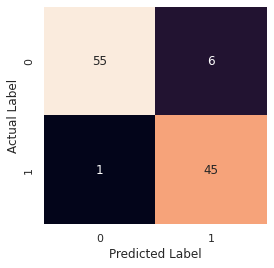

In [17]:
from sklearn.metrics import confusion_matrix, classification_report

# Plotting the confusion_matrix
def plot_conf_mat(y_test, y_pred):
    conf_mat = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(4,4))
    sns.heatmap(conf_mat, annot=True, cbar=False)
    #plt.title("Random Forest")
    plt.xlabel("Predicted Label")
    plt.ylabel("Actual Label")
    plt.show()
    
plot_conf_mat(y_test, y_pred)

In [18]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.90      0.94        61
           1       0.88      0.98      0.93        46

    accuracy                           0.93       107
   macro avg       0.93      0.94      0.93       107
weighted avg       0.94      0.93      0.93       107



## Random ForestClassifier

In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Set up random seed
np.random.seed(42)

# Create data
X = df.drop("result", axis=1)
y = df["result"]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
#Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# Instantiate the model
clf = RandomForestClassifier(max_depth=8, random_state=0)

# Fit the model
clf.fit(X_train, y_train)

# Score
clf.score(X_test, y_test)

1.0

In [40]:
y_pred = clf.predict(X_test)

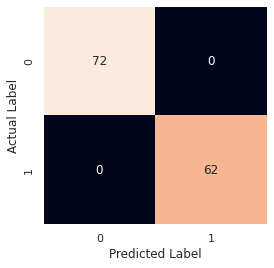

In [41]:
plot_conf_mat(y_test, y_pred)

In [42]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        72
           1       1.00      1.00      1.00        62

    accuracy                           1.00       134
   macro avg       1.00      1.00      1.00       134
weighted avg       1.00      1.00      1.00       134



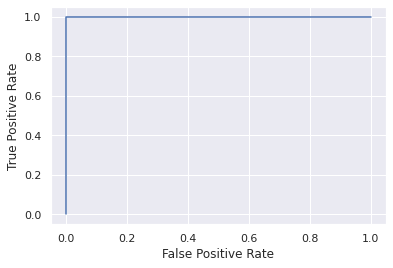

In [43]:
#define metrics
from sklearn import metrics
y_pred_proba = clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

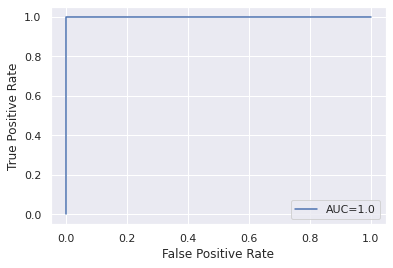

In [44]:
#define metrics
y_pred_proba = clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [67]:
import shap

# load JS visualization code to notebook
shap.initjs()

In [ ]:
shap.initjs()

In [50]:
explainer = shap.TreeExplainer(clf)
shap_values = explainer.shap_values(X_test)

In [73]:
shap.force_plot(explainer.expected_value[0], shap_values[0],X_test)

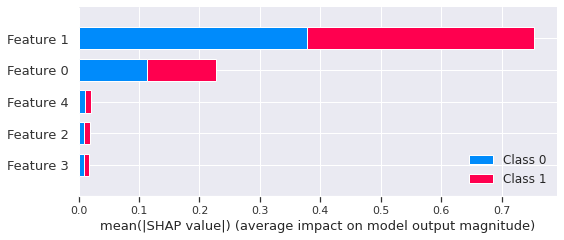

In [74]:
shap.summary_plot(shap_values, X_test)

# Conclusion

## In this way, excellent metrics were achieved with the random forest model. The exploratory analysis showed a great influence of hemoglobin and gender and that was confirmed by shap. In addition, an interesting observation to be made is regarding the mchc, as this metric with lower values usually results in anemia. However, the statistical test pointed to a lower mean for non-anemic individuals. To better assess this situation, it would be interesting to add more variables that explain the complex dynamics of hemoglobin, as well as the age of the individuals..
